## How are in-demand skills trending fot Data Analysts?^

# Methodology
1. Aggregate skills counts monthly.
2. Re-analyze based on percentage of total jobs.
3. Plot montly skill demand.

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

c:\Users\49157\anaconda3\envs\dataenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_DE = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

In [4]:
df_DA_DE['job_posted_month_no'] = df_DA_DE['job_posted_date'].dt.month

In [5]:
df_DA_DE_explode = df_DA_DE.explode('job_skills')

In [7]:
df_DA_DE_pivot = df_DA_DE_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_DE_pivot.loc['Total'] = df_DA_DE_pivot.sum()
df_DA_DE_pivot = df_DA_DE_pivot[df_DA_DE_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_DE_pivot = df_DA_DE_pivot.drop('Total') 
df_DA_DE_pivot

job_skills,sql,python,tableau,r,power bi,excel,qlik,looker,sap,go,...,laravel,electron,seaborn,matplotlib,microsoft teams,microstrategy,nltk,puppet,powershell,crystal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,23,18,15,8,6,6,2,3,0,4,...,0,0,0,0,0,0,0,0,0,0
2,21,19,13,4,10,11,4,5,1,5,...,0,0,0,0,0,0,0,0,0,0
3,27,20,11,10,16,14,2,0,2,2,...,0,0,0,0,0,1,0,0,0,0
4,25,28,7,16,8,5,2,4,3,5,...,0,0,0,0,0,0,0,0,0,0
5,23,21,13,11,7,8,2,4,2,2,...,1,0,0,0,0,0,0,0,0,0
6,17,15,6,6,4,1,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0
7,18,15,7,6,5,7,3,2,1,3,...,0,0,0,0,0,0,0,0,0,0
8,11,9,5,4,4,2,4,2,2,3,...,0,0,0,0,1,0,0,0,0,0
9,36,23,18,11,18,12,4,3,5,3,...,0,0,0,0,0,0,0,0,0,1


In [9]:
DA_totals = df_DA_DE.groupby('job_posted_month_no').size() 

In [24]:
df_DA_DE_percent= df_DA_DE_pivot.div(DA_totals/100, axis=0)

In [25]:
df_DA_DE_percent = df_DA_DE_percent.reset_index()
# If the index is unnamed, it will be called 'index' after reset_index()
if 'job_posted_month_no' not in df_DA_DE_percent.columns:
    df_DA_DE_percent.rename(columns={'index': 'job_posted_month_no'}, inplace=True)

df_DA_DE_percent['job_posted_month'] = df_DA_DE_percent['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(int(x), format='%m').strftime('%b') if pd.notna(x) else ''
)
df_DA_DE_percent = df_DA_DE_percent.set_index('job_posted_month')
df_DA_DE_percent = df_DA_DE_percent.drop(columns='job_posted_month_no')
df_DA_DE_percent

job_skills,sql,python,tableau,r,power bi,excel,qlik,looker,sap,go,...,laravel,electron,seaborn,matplotlib,microsoft teams,microstrategy,nltk,puppet,powershell,crystal
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,71.875000,56.250000,46.875000,25.000000,18.750000,18.750000,6.250000,9.375000,0.000000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,53.846154,48.717949,33.333333,10.256410,25.641026,28.205128,10.256410,12.820513,2.564103,12.820513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,61.363636,45.454545,25.000000,22.727273,36.363636,31.818182,4.545455,0.000000,4.545455,4.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.272727,0.000000,0.000000,0.000000,0.000000
Apr,53.191489,59.574468,14.893617,34.042553,17.021277,10.638298,4.255319,8.510638,6.382979,10.638298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,60.526316,55.263158,34.210526,28.947368,18.421053,21.052632,5.263158,10.526316,5.263158,5.263158,...,2.631579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,70.833333,62.500000,25.000000,25.000000,16.666667,4.166667,12.500000,8.333333,0.000000,20.833333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,64.285714,53.571429,25.000000,21.428571,17.857143,25.000000,10.714286,7.142857,3.571429,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,57.894737,47.368421,26.315789,21.052632,21.052632,10.526316,21.052632,10.526316,10.526316,15.789474,...,0.000000,0.000000,0.000000,0.000000,5.263158,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,36.363636,23.232323,18.181818,11.111111,18.181818,12.121212,4.040404,3.030303,5.050505,3.030303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010101


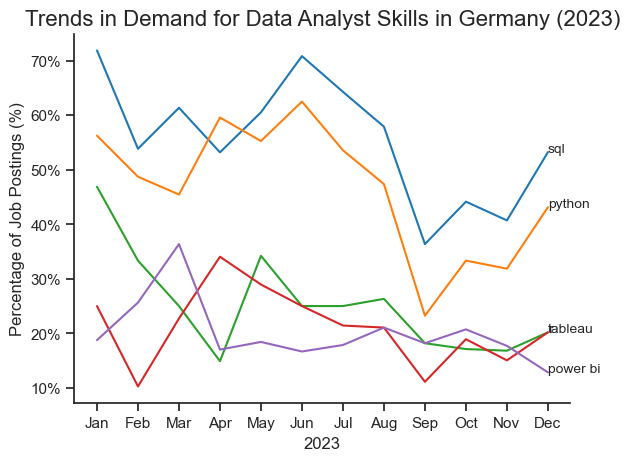

In [31]:
df_plot =df_DA_DE_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style="ticks")
sns.despine()
plt.title('Trends in Demand for Data Analyst Skills in Germany (2023)', fontsize=16)
plt.ylabel('Percentage of Job Postings (%)', fontsize=12)
plt.xlabel('2023', fontsize=12)
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i], fontsize=10)